In [12]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import timeit

# Upper Matrix Solver

In [6]:
def upper_matrix_solver(A,b):     #input an upper triangular matrix A and b-vector
    
    if np.size(A,axis=0) != np.size(A,axis=1):
        print("Please input a square matrix")
    
    else:
        n = np.size(A,axis=0)-1
        x = np.zeros((1,n+1))
        
        for i in range(n,-1,-1):
            x[0,i] = (b[0,i] - np.sum(A[i,i+1:n+1]*x[0,i+1:n+1])) / A[i,i]
            
        return x


# Example of Upper Matrix Solver

In [7]:
T1 = np.array([[44,31,4],[0,44,1],[0,0,11]])  
h1 = np.array([[23,4,7]])

upper_matrix_solver(T1,h1)

array([[0.41101615, 0.07644628, 0.63636364]])

# Lower Matrix Solver

In [8]:
def lower_matrix_solver(A,b):        #input a lower triangular matrix A and b-vector
    
    if ((np.size(A,axis=0)) != (np.size(A,axis=1))):
        print("Please input a square matrix")
    
    else:
        n = np.size(A,axis=0)-1
        x = np.zeros((1,n+1))
        
        for i in range(0,n+1):
            x[0,i] = (b[i] - np.sum(A[i,0:i]*x[0,0:i])) / A[i,i] 
            
        return x


# Example of Lower Matrix Solver

In [9]:
S1 = np.array([[1,0,0,0],[73,1,0,0],[22,91,1,0],[93,2,6,1]])      
v2 = np.array([2,9,21,30])

lower_matrix_solver(S1,v2)

array([[ 2.0000e+00, -1.3700e+02,  1.2444e+04, -7.4546e+04]])

# LU Decomposition Solver

In [10]:
def LU(A):             #Input a square nxn matrix
    n = np.size(A,0)-1 #size of an nxn matrix
    
    if np.size(A,0) != np.size(A,1):
        print("Please input a square matrix")
        
    else:
        L = np.zeros((n+1,n+1))
        U = np.zeros((n+1,n+1))
        
        for i in range(0,n+1):
            U[0,i] = A[0,i]
            L[i,i] = 1
            for k in range(0,n):
                for j in range(k+1,n+1):
                    
                    #Lower Triangular Matrix
                    L[j,k] = (A[j,k] - np.sum(L[j,0:k]*U[0:k,k])) / U[k,k]

                    #Upper Triangular Matrix
                    U[k+1,j] = (A[k+1,j] - np.sum(L[k+1,0:k+1]*U[0:k+1,j]))

        return L,U       #Output is the lower triangular matrix L and upper triangular matrix U
     

# Example of LU Decomposition Solver

In [11]:
H = np.random.rand(4,4)    

LU(H)

(array([[ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.87809488,  1.        ,  0.        ,  0.        ],
        [ 0.17826185, 22.26610164,  1.        ,  0.        ],
        [ 1.5195241 , 21.21043302,  1.27444614,  1.        ]]),
 array([[ 0.6303828 ,  0.02427384,  0.37252219,  0.95360172],
        [ 0.        ,  0.03717248,  0.21038829, -0.18539753],
        [ 0.        ,  0.        , -3.8310666 ,  4.2019011 ],
        [ 0.        ,  0.        ,  0.        , -2.05812949]]))

# Time Analysis of LU Decomposition

We will use matrices of size $2^{n}$ with random numerical entries to analyze the time complexity of the LU decomposition solver

In [14]:
def randmat(k):   #This code generates a square matrix of size 2^(n x n) with random entries
    n = 2**k
    A = np.random.rand(n,n)
    return A        #Output is a square nxn matrix with random entries


def time_func(func,k,reps=10):    #This code calculates the time it takes to run my LU code averaged 
                                  #over 10 repetitions
    timelst = []
    for i in k:
        B = randmat(i)
        avg_time = timeit(lambda:func(B),number=reps) / reps
        timelst.append(avg_time)
    
    return (np.array(timelst)*1000)     #The output is in ms (microseconds)


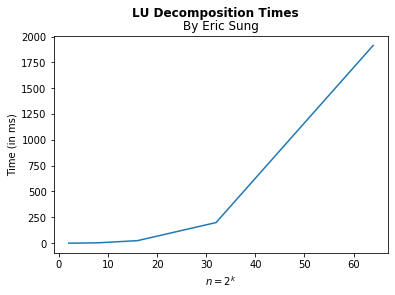

In [15]:
k1 = np.arange(1,7)   
n = 2**k1             #Matrix size
time_func(LU,k1)

plt.plot(n,time_func(LU,k1))

plt.suptitle("LU Decomposition Times",fontsize=12,fontweight='bold')
plt.title("By Eric Sung")
plt.xlabel('$n=2^{k}$')
plt.ylabel('Time (in ms)')
plt.show()

From the time plot, we are able to see that the LU code takes increasingly longer times for larger matrices with the 
the time plot taking on extremely high time values in for larger n values. On the other hand, we see that the time
the code takes for smaller n values is negligible. 